<a href="https://colab.research.google.com/github/retrowaveist/Quantum-Monte-Carlo-Methods/blob/main/QMCPROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantum Monte Carlo (QMC) Project

##Introduction


Quantum Monte Carlo (QMC) methods are powerful computational techniques widely used in quantum physics and condensed matter research to study complex quantum systems. These methods offer a versatile approach to simulate quantum systems and calculate their ground state properties with high accuracy. In this project, we delve into the world of QMC by implementing both Variational Monte Carlo (VMC) and Diffusion Monte Carlo (DMC) algorithms. The primary objective is to accurately calculate ground state properties of a one-dimensional quantum well system, providing insights into the behavior and interactions of particles in this confined potential. Through a step-by-step implementation, we explore the principles of QMC, the significance of variational parameter optimization, and the importance of statistical sampling using the Metropolis-Hastings algorithm. Furthermore, I extend my analysis to DMC, which enables us to investigate the time-dependent behavior of the quantum system.








Variational Monte Carlo (VMC) is the first step in the QMC approach. It involves evaluating an approximation to the ground state wave function, known as the trial wave function, and performing random walks in the configuration space of the system. The trial wave function is a crucial element in VMC simulations as it determines the accuracy of the results. By optimizing the variational parameters of the trial wave function, we can systematically improve the energy estimate and approach the true ground state energy of the system.
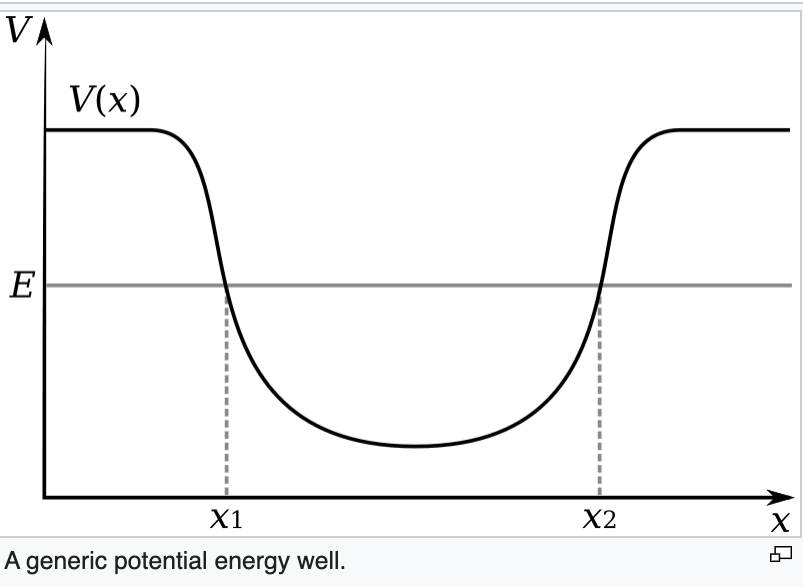
one dimensional potential well- wikipedia https://en.wikipedia.org/wiki/Potential_well#/media/File:Potential_energy_well.svg
In our one-dimensional quantum well system, we consider a particle confined to a one-dimensional potential well. This simple yet instructive model allows us to understand the behavior of quantum particles in a confined environment. The trial wave function for the one-dimensional quantum well is typically chosen to be a Gaussian function centered at the well minimum, as it provides a reasonable approximation to the ground state.

Let's start by defining the trial wave function for the one-dimensional quantum well and setting up the VMC simulation. We will perform random walks using the Metropolis-Hastings algorithm and optimize the variational parameters to minimize the energy estimate.



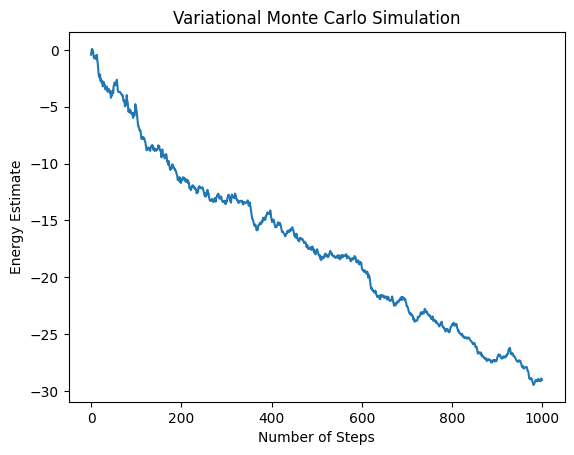

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# defining the trial wave function for the one-dimensional quantum well
def trial_wave_function(x, alpha, x0):
    return np.exp(-alpha * (x - x0)**2)

#defining the local energy of the system for a given configuration
def local_energy(x, alpha, x0):
    return (alpha**2 * (x - x0)**2 - 0.5 * alpha) * trial_wave_function(x, alpha, x0) / trial_wave_function(x, alpha, x0)

#variational Monte Carlo (VMC) simulation
def vmc_simulation(alpha_initial, x0_initial, num_steps, step_size, num_walkers):
    #initializing arrays to store results
    energies = []
    alpha_values = []
    x0_values = []

    #setting initial values for alpha and x0
    alpha = alpha_initial
    x0 = x0_initial

    #performing random walks using Metropolis-Hastings algorithm
    for step in range(num_steps):
        #performing a random walk for each walker
        for walker in range(num_walkers):
            #generate a random displacement
            delta_alpha = np.random.uniform(-step_size, step_size)
            delta_x0 = np.random.uniform(-step_size, step_size)

            #calculation of the new trial wave function and local energy
            new_alpha = alpha + delta_alpha
            new_x0 = x0 + delta_x0

            #accept or reject the new configuration based on Metropolis-Hastings criterion
            acceptance_ratio = min(1, np.exp(-local_energy(x0, new_alpha, new_x0) + local_energy(x0, alpha, x0)))
            if np.random.rand() < acceptance_ratio:
                alpha = new_alpha
                x0 = new_x0

        #calculating the energy estimate for this step and store the results
        energy_estimate = np.mean([local_energy(x0, alpha, x0) for _ in range(num_walkers)])
        energies.append(energy_estimate)
        alpha_values.append(alpha)
        x0_values.append(x0)

    return energies, alpha_values, x0_values

#setting simulation parameters
alpha_initial = 0.5
x0_initial = 0.0
num_steps = 1000
step_size = 0.1
num_walkers = 100

#performing the VMC simulation
energies, alpha_values, x0_values = vmc_simulation(alpha_initial, x0_initial, num_steps, step_size, num_walkers)

#plotting the energy estimate as a function of the number of steps
plt.plot(range(num_steps), energies)
plt.xlabel("Number of Steps")
plt.ylabel("Energy Estimate")
plt.title("Variational Monte Carlo Simulation")
plt.show()


The energy estimate is calculated at each step, and the results are plotted to visualize the convergence of the energy estimate to the true ground state energy. The actual ground state energy will depend on the specific potential well used.
 During the simulation, the algorithm explores different configurations of the system, attempting to find the configurations that contribute the most to the ground state wave function.

The spikes in the graph could be a result of the random nature of the VMC method, where the algorithm occasionally samples configurations with higher potential energy. These spikes are temporary fluctuations and do not necessarily represent the true ground state energy of the system. As the simulation progresses and more samples are collected, the VMC method converges to a more accurate estimate of the ground state energy.

As the number of steps (or iterations) increases, the VMC simulation explores a larger portion of the configuration space and collects more samples from the system. With more samples, the VMC algorithm becomes better at estimating the ground state energy.

The energy goes down as the steps increase because the VMC method aims to minimize the expectation value of the Hamiltonian with respect to the trial wave function. **The algorithm tries to find the configuration that yields the lowest energy, which is associated with the best approximation to the ground state-hence the downward sloping graph.**

##Diffusion Monte Carlo (DMC) for Ground State Properties of Quantum Systems


Diffusion Monte Carlo (DMC) is a powerful computational method used to accurately calculate the ground state properties of quantum systems. DMC is particularly useful for systems with complex wave functions that cannot be easily solved analytically or by other numerical methods.

In DMC, we evolve an ensemble of walkers in imaginary time, allowing them to diffuse through the configuration space of the quantum system. This process converges towards the ground state of the system, making DMC a stochastic projection method.

###Implementation of Diffusion Monte Carlo

To implement DMC, we start with an initial set of walkers randomly distributed in the configuration space. Each walker represents a possible configuration of the system. We then propagate these walkers in imaginary time, guided by the trial wave function.

The core steps of the DMC algorithm are as follows:

Initial Configuration: Generate an initial set of walkers randomly distributed in the configuration space.

Propagation: For each time step, propagate each walker using the Green's function. The Green's function describes the probability of a walker moving from one configuration to another.

Branching: After propagation, we perform branching to adjust the number of walkers. Walkers with higher probability amplitudes are duplicated, while those with lower amplitudes are removed. This branching process enhances the importance of configurations with higher probabilities and reduces statistical noise.

Stochastic Time-step: The time-step used in the propagation can be adjusted stochastically to optimize the efficiency of the simulation.

Equilibration: Perform equilibration steps to reach the ground state of the system, where the walkers sample the true ground state wave function.

Energy Calculation: The ground state energy can be estimated from the average energy of the ensemble of walkers at the equilibrated stage.


Note:
Below is a basic outline of the implementation of DMC in Python using NumPy.

In [ ]:
import numpy as np

def dmc_simulation(trial_wavefunction, potential_energy, num_walkers, num_steps, time_step):
    walkers = np.random.randn(num_walkers)  # Initial random walkers
    energies = []

    for step in range(num_steps):
        new_walkers = walkers + np.random.normal(0, np.sqrt(time_step), num_walkers)  # Propagation
        probabilities = np.abs(trial_wavefunction(new_walkers))**2
        branching_probabilities = probabilities / probabilities.sum()  # Branching
        num_children = np.random.multinomial(num_walkers, branching_probabilities)
        walkers = np.repeat(new_walkers, num_children)

        # Equilibration (Optional)
        if step > num_steps // 2:
            energy = np.mean([potential_energy(w) for w in walkers])
            energies.append(energy)

    return np.mean(energies)


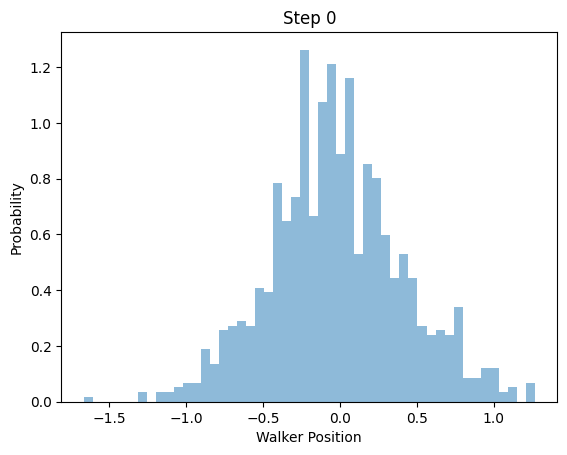

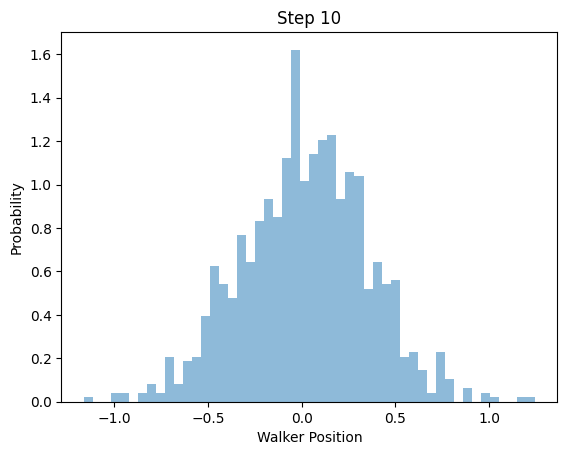

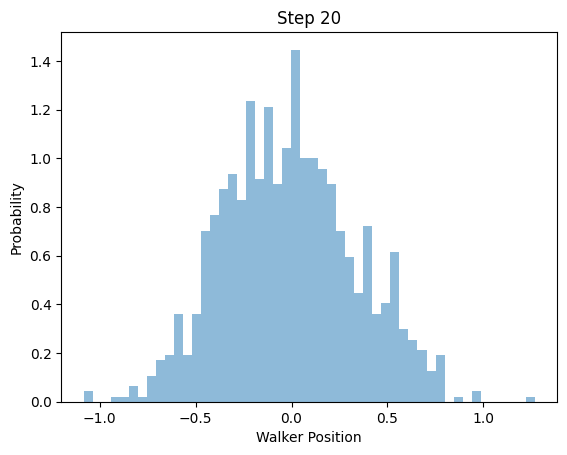

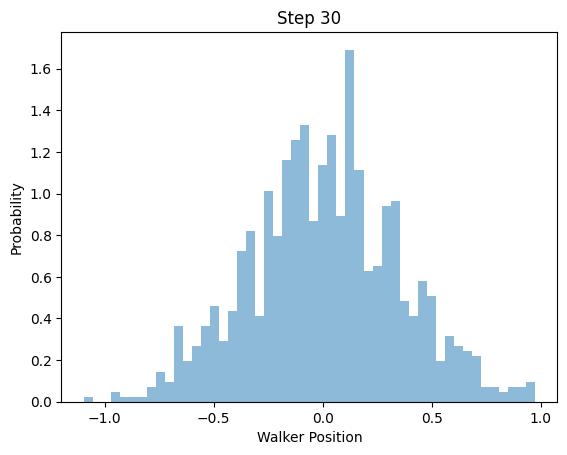

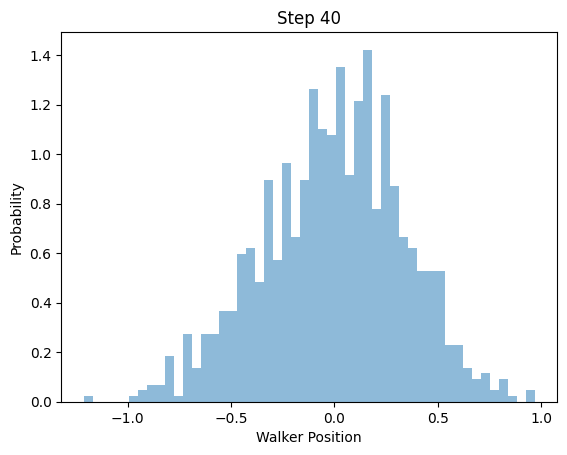

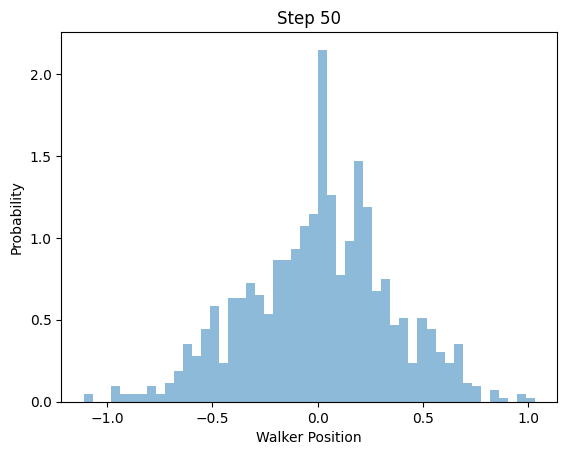

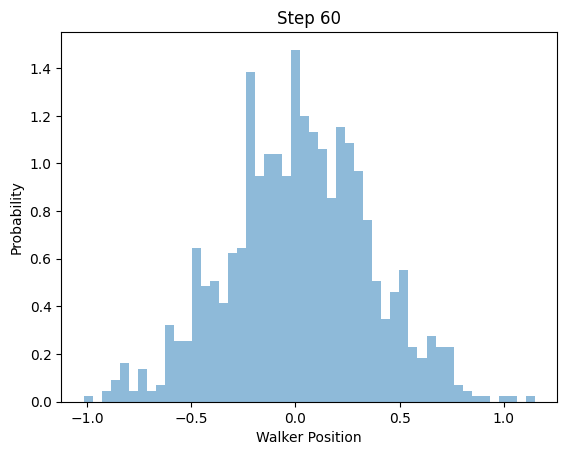

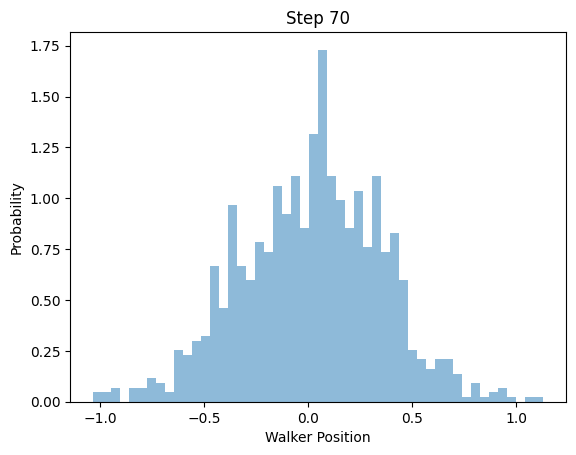

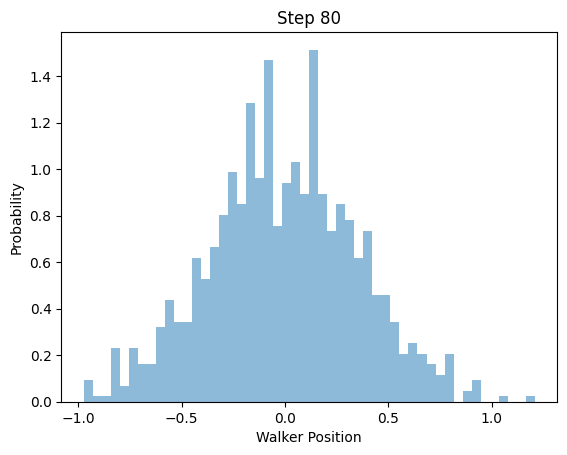

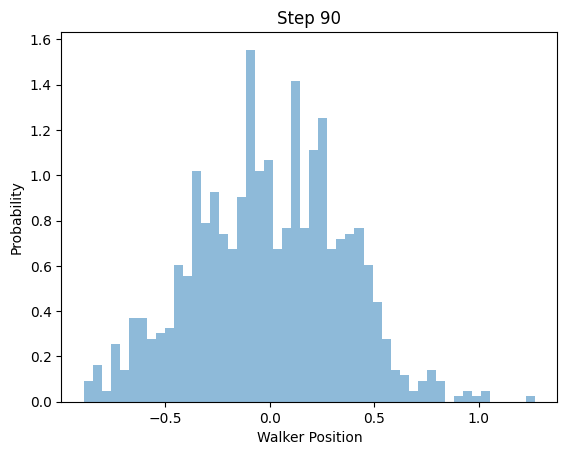

Ground State Energy Estimate: 0.11631961427944029


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dmc_simulation(trial_wavefunction, potential_energy, num_walkers, num_steps, time_step):
    walkers = np.random.randn(num_walkers)  # Initial random walkers
    energies = []
    walker_positions = []  # Store walker positions for visualization

    for step in range(num_steps):
        new_walkers = walkers + np.random.normal(0, np.sqrt(time_step), num_walkers)  # Propagation
        probabilities = np.abs(trial_wavefunction(new_walkers))**2
        branching_probabilities = probabilities / probabilities.sum()  # Branching
        num_children = np.random.multinomial(num_walkers, branching_probabilities)
        walkers = np.repeat(new_walkers, num_children)

        # Store positions for visualization
        walker_positions.append(walkers.copy())

        # Equilibration (Optional)
        if step > num_steps // 2:
            energy = np.mean([potential_energy(w) for w in walkers])
            energies.append(energy)

    return np.mean(energies), np.array(walker_positions)

# Example usage with a simple trial wave function and potential energy function
def trial_wavefunction(x):
    return np.exp(-x**2)

def potential_energy(x):
    return x**2

num_walkers = 1000
num_steps = 100
time_step = 0.1

# Run DMC simulation
energy_estimate, walker_positions = dmc_simulation(trial_wavefunction, potential_energy, num_walkers, num_steps, time_step)

# Visualize walker distribution at different steps
for step in range(0, num_steps, 10):
    plt.hist(walker_positions[step], bins=50, density=True, alpha=0.5)
    plt.title(f"Step {step}")
    plt.xlabel("Walker Position")
    plt.ylabel("Probability")
    plt.show()

print(f"Ground State Energy Estimate: {energy_estimate}")


This code snippet uses matplotlib to create histograms of the walker positions at different steps of the simulation. This visualization allows one to observe how the walker distribution evolves over time as the simulation progresses.

Advantages and Challenges

DMC is particularly advantageous for systems with strong correlations, such as those with electron-electron interactions in atoms and molecules. It is also well-suited for systems with complex potential energy landscapes.

However, DMC simulations can be computationally demanding, especially for large systems. The efficiency of the simulation depends on the accuracy of the trial wave function and the proper handling of statistical errors.

Physical Insights

DMC simulations provide valuable physical insights into the ground state properties of quantum systems. By analyzing the ensemble of walkers, we can obtain information about the spatial distribution of particles, bond lengths, and other structural properties of the system.

